 # Customer Churn Prediction Project using Machine Learning with EDA

**Author:** Kidima Medy Masuka

**Date:** 2026

### Dataset Description ###

The dataset used in this project is a simulated customer churn dataset sourced from Kaggle and was originally used for academic coursework purposes. While the data does not represent a real organisation, it reflects common customer behaviour patterns observed in subscription-based businesses and is suitable for demonstrating churn prediction techniques.


Objective: Predict customer churn(leave) and identify key drivers to support
customer retention strategies.


This project applies machine learning techniques to predict whether
a customer is likely to churn based on historical data.


In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')


## 1. Business Understanding

Customer churn represents a major financial risk for subscription-based
businesses. Retaining existing customers is often more cost-effective
than acquiring new ones.

The goal of this project is to:
- Predict customer churn using machine learning models
- Identify important factors influencing churn
- Provide insights that can support retention strategies


## 2. Data Understanding

In this section, we explore the dataset to understand:
- The structure of the data
- The target variable (Churn)
- Potential data quality issues


## 3. Data Wrangling & EDA ( Exploratory Data Analysis)

In [192]:
df = pd.read_csv('../data/Telco-Customer-Churn-dataset-dirty.csv')

In [193]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1,1,1,101348.88,1.0
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1,0,1,112542.58,0.0
2,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2,0,0,93826.63,0.0
3,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1,1,1,79084.10,0.0
4,6,15574012,Chu,645.0,Spain,Male,44.0,8.0,113755.78,2,1,0,149756.71,1.0


In [194]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9775,9996,15606229,Obijiaku,771.0,France,Male,39.0,5.0,0.00,2,1,0,96270.64,0.0
9776,9997,15569892,Johnstone,516.0,France,Male,35.0,10.0,57369.61,1,1,1,101699.77,0.0
9777,9998,15584532,Liu,709.0,France,Female,36.0,7.0,0.00,1,0,1,42085.58,1.0
9778,9999,15682355,Sabbatini,772.0,Germany,Male,42.0,3.0,75075.31,2,1,0,92888.52,1.0
9779,10000,15628319,Walker,792.0,France,Female,28.0,4.0,130142.79,1,1,0,38190.78,0.0


In [195]:
df.shape

(9780, 14)

 We have 9780 entries(rows) and 14 columns only 

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9780 entries, 0 to 9779
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9780 non-null   int64  
 1   CustomerId       9780 non-null   int64  
 2   Surname          9780 non-null   object 
 3   CreditScore      9682 non-null   float64
 4   Geography        9672 non-null   object 
 5   Gender           9682 non-null   object 
 6   Age              9780 non-null   float64
 7   Tenure           9767 non-null   float64
 8   Balance          9780 non-null   float64
 9   NumOfProducts    9780 non-null   int64  
 10  HasCrCard        9780 non-null   int64  
 11  IsActiveMember   9780 non-null   int64  
 12  EstimatedSalary  9780 non-null   float64
 13  Exited           9755 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 1.0+ MB


 The creditScore, Geography ,Gender , Tenure and Exited columns are all missing some values(Nulls)

In [197]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore         98
Geography          108
Gender              98
Age                  0
Tenure              13
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited              25
dtype: int64

This properly illusrrates how many missing values on each of those above columns

In [198]:
df['CreditScore'].value_counts()

CreditScore
850.0    225
678.0     62
667.0     53
684.0     52
705.0     51
        ... 
423.0      1
404.0      1
351.0      1
365.0      1
419.0      1
Name: count, Length: 460, dtype: int64

We will start with the CreditScore column that has 98 missing values, 
and even though when we did the value counts of the column,
and it says that the score of 850 is the most used number,
we cannot use the panda mode function to replace the most frequent value of 850 with the missing values,
instead we will use the average mean function to get the average credit score for the missing values. 

In [199]:
Average_Credit_Score = df['CreditScore'].mean()
print(f'Average_Credit_Score:{Average_Credit_Score}')

Average_Credit_Score:650.464676719686


the Average CreditScore of 650.46 will be the one to be replaced in all the missing values column of CreditScore

In [200]:
df['CreditScore'] = df['CreditScore'].fillna(Average_Credit_Score)

the value has been successfully replaced in the table and there are no more missing values in CreditScore column

In [201]:
df['Geography'].value_counts()

Geography
France     4855
Germany    2437
Spain      2380
Name: count, dtype: int64

In [202]:
print(df['Geography'].dtype)

object


The Geography column is an object column and we will use the mode fucntion instead for the missing values

In [203]:
Frequent_value = df['Geography'].mode()[0]
print(f'Frequent_value:{Frequent_value}')

Frequent_value:France


we will replace the most frequent value france in all the missing values in Geography column

In [204]:
df['Geography'] = df['Geography'].fillna(Frequent_value)

the value has been successfully replaced in the table and there are no more missing values in Geography column

In [205]:
df['Gender'].value_counts()

Gender
Male      5275
Female    4407
Name: count, dtype: int64

We will also replace the missing values with the mode function in Gender column as well

In [206]:
Frequent_value = df['Gender'].mode()[0]
print(f'Frequent_value:{Frequent_value}')

Frequent_value:Male


we will replace the most frequent value Male in all the missing value in Gender

In [207]:
df['Gender'] = df['Gender'].fillna(Frequent_value)

the value has been successfully replaced in the table and there are no more missing values in Gender column

In [208]:
df['Tenure'].value_counts()

Tenure
2.0     1018
1.0     1015
8.0     1004
7.0     1003
3.0      990
5.0      979
4.0      967
9.0      966
6.0      944
10.0     474
0.0      407
Name: count, dtype: int64

We will also use the mean function in the Tenure column 

In [209]:
Average_Tenure = df['Tenure'].mean()
print(f'Average_Tenure:{Average_Tenure}')

Average_Tenure:5.010238558410975


the Average Tenure is 5

In [210]:
df['Tenure'] = df['Tenure'].fillna(Average_Tenure)

the value has been replaced in the table and there are no more missing values in Tenure column

In [211]:
df['Exited'].value_counts()

Exited
0.0    7760
1.0    1995
Name: count, dtype: int64

0 is the most used value in the Exited column, therefore we will replace this value in all the missing values 

In [212]:
Frequent_value = df['Exited'].mode()[0]
print(f'Frequent_value:{Frequent_value}')

Frequent_value:0.0


In [213]:
df['Exited'] = df['Exited'].fillna(Frequent_value)

the value has been replaced in the  table and there are no more missing values in Exited column

In [214]:
df.notnull().sum()

RowNumber          9780
CustomerId         9780
Surname            9780
CreditScore        9780
Geography          9780
Gender             9780
Age                9780
Tenure             9780
Balance            9780
NumOfProducts      9780
HasCrCard          9780
IsActiveMember     9780
EstimatedSalary    9780
Exited             9780
dtype: int64

we can see that all the columns are complety full, there are no single missing values anywhere in our dataset after the cleaning process

In [215]:
df.duplicated().sum()

np.int64(0)

We do not have any duplicated values

In [216]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9780.000000,9.780000e+03,9780.000000,9780.000000,9780.000000,9780.000000,9780.000000,9780.000000,9780.000000,9780.000000,9780.000000
mean,5000.851534,1.569079e+07,650.464677,38.924744,5.010239,76532.486714,1.530164,0.705521,0.514417,99979.722515,0.203988
std,2886.218170,7.191669e+04,96.303017,10.487965,2.892225,62401.225835,0.581624,0.455831,0.499818,57495.918041,0.402981
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2502.750000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.685000,0.000000
50%,4999.500000,1.569063e+07,651.000000,37.000000,5.000000,97245.995000,1.000000,1.000000,1.000000,100114.385000,0.000000
75%,7501.250000,1.575308e+07,717.000000,44.000000,7.000000,127651.035000,2.000000,1.000000,1.000000,148990.230000,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


The table above checks the summary statitistics of our dataset( the count, mean, the standard deviation, minimum, maximum)

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in the machine learning workflow, aimed at understanding the structure, patterns, and key characteristics of the dataset.

In this section, we analyze the distribution of the target variable (Exited) to assess class balance, followed by an examination of customer behavior and demographic features. Specifically, we explore the relationship between churn and customer tenure (loyalty), credit score, estimated salary, age as well as account balance.

Multiple visualizations are used to assess age-related churn patterns, including churn rate by age, average age by churn status (bar and violin plots), and the balance vs Churn Analysis. Finally, a correlation heatmap is employed to evaluate linear relationships between numerical features and customer churn.

The insights derived from this analysis guide feature selection, preprocessing decisions, and the choice of appropriate evaluation metrics for churn prediction.

✅ Explanation:

My EDA focuses on understanding churn behavior through customer loyalty, financial indicators, and age demographics. By combining univariate, bivariate, and correlation analyses, I was able to identify meaningful patterns that directly informed feature selection, preprocessing, and model evaluation decisions.


In [217]:
numeric_columns_data = df.select_dtypes(include=[np.number])

In [218]:
numeric_columns_data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.000586,0.006218,0.000006,-0.005070,-0.008765,0.008747,0.002187,0.010654,-0.004612,-0.013880
CustomerId,0.000586,1.000000,0.003397,0.011581,-0.012485,-0.010415,0.015064,-0.013144,0.000086,0.014576,-0.002518
CreditScore,0.006218,0.003397,1.000000,-0.001836,0.000923,0.004078,0.014453,-0.003797,0.023453,-0.000300,-0.027309
Age,0.000006,0.011581,-0.001836,1.000000,-0.012067,0.031587,-0.031228,-0.013876,0.086606,-0.009318,0.284080
Tenure,-0.005070,-0.012485,0.000923,-0.012067,1.000000,-0.011595,0.014344,0.021132,-0.026983,0.006988,-0.015038
Balance,-0.008765,-0.010415,0.004078,0.031587,-0.011595,1.000000,-0.306374,-0.015795,-0.010446,0.011798,0.119839
NumOfProducts,0.008747,0.015064,0.014453,-0.031228,0.014344,-0.306374,1.000000,0.003036,0.010816,0.015363,-0.050033
HasCrCard,0.002187,-0.013144,-0.003797,-0.013876,0.021132,-0.015795,0.003036,1.000000,-0.009640,-0.012961,-0.009194
IsActiveMember,0.010654,0.000086,0.023453,0.086606,-0.026983,-0.010446,0.010816,-0.009640,1.000000,-0.011418,-0.156506
EstimatedSalary,-0.004612,0.014576,-0.000300,-0.009318,0.006988,0.011798,0.015363,-0.012961,-0.011418,1.000000,0.011015


In [219]:
corr_matrix = numeric_columns_data.corr()

***Correlation Heatmap***

The correlation heatmap below visualizes linear relationships between numerical features and the target variable Exited.
Age, tenure, and activity status show stronger correlations with churn compared to other features.
No strong multicollinearity is observed, suggesting that most features can be retained for modeling.

✅ Explanation:

Correlation analysis helps validate feature relevance and reduces redundancy before modeling.
Why this plot matters is because it helps explain model behavior and feature importance

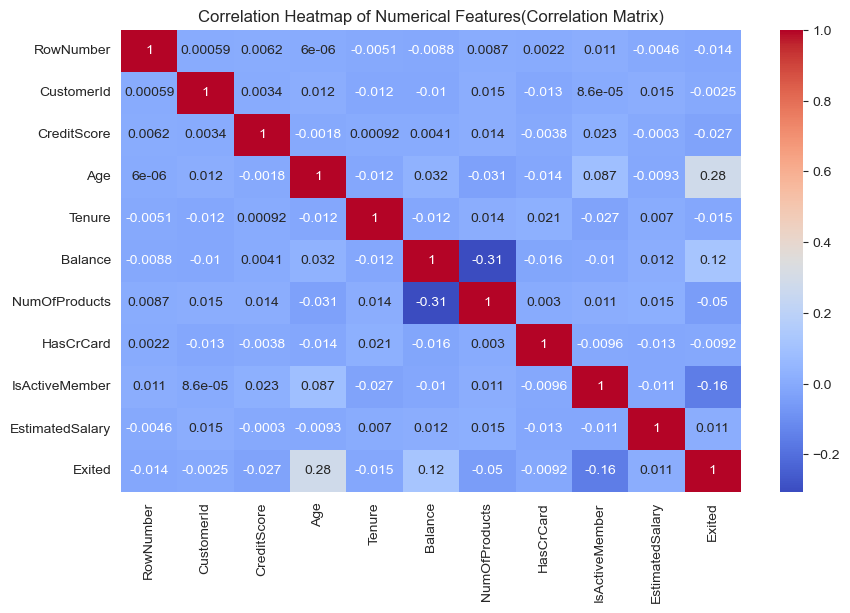

In [220]:
plt.figure(figsize=(10,6))
sns.heatmap(
    numeric_columns_data.corr(),
    cmap='coolwarm',
    annot=True
)
plt.title('Correlation Heatmap of Numerical Features(Correlation Matrix)')
plt.show()


***Churn Distribution (Target Variable)***

Churn Distribution (Exited)

This plot shows the distribution of the target variable Exited, where 0 represents customers who stayed and 1 represents customers who churned.
The dataset is clearly imbalanced, with a higher proportion of customers remaining compared to those who exited.
This class imbalance indicates that accuracy alone may be misleading, and performance metrics such as recall, F1-score, and AUC should be prioritized during model evaluation.

✅ Explanation:

Because churned customers are fewer, I focused on metrics beyond accuracy to properly evaluate model performance.

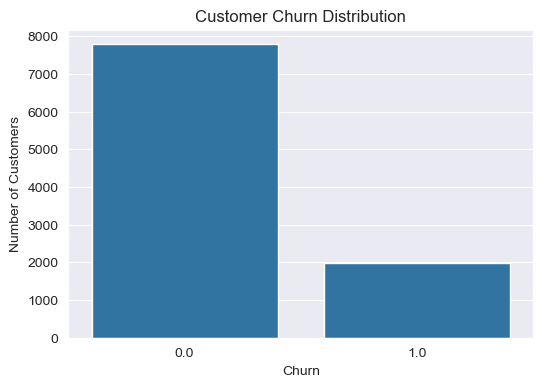

Churn Distribution (Target Variable)


In [221]:
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

print('Churn Distribution (Target Variable)')


***Customer Tenure vs Churn (Customer Loyalty)***

 Tenure vs Exited

This plot compares customer tenure with churn status.
Customers with shorter tenure are more likely to churn, while long-tenure customers tend to remain with the company.
This suggests that customer loyalty increases over time and that early-stage customers are at higher churn risk.

✅Explanation:

Tenure is a strong indicator of loyalty, so retaining customers early in their lifecycle is critical.

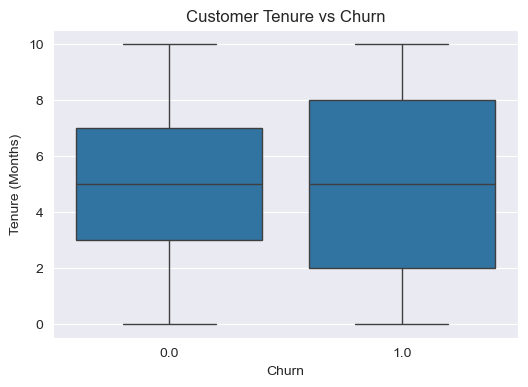

Tenure vs Churn (Customer Loyalty)


In [222]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.title('Customer Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

print('Tenure vs Churn (Customer Loyalty)')


***Credit Score vs Churn***

CreditScore vs Exited

This visualization examines the relationship between credit score and churn.
Customers who churn tend to have slightly lower credit scores on average, although the separation is not extremely strong.
This suggests that credit score alone may not be a decisive predictor but can contribute useful information when combined with other features.

✅Explanation:

Some features are weak on their own but become valuable when combined in a multivariate model.

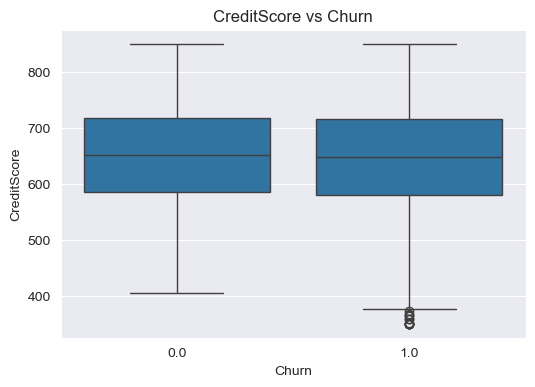

In [223]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('CreditScore vs Churn')
plt.xlabel('Churn')
plt.ylabel('CreditScore')
plt.show()


***Estimated Salary vs Churn***

EstimatedSalary vs Exited

This plot shows the distribution of estimated salary for churned and non-churned customers.
The distributions largely overlap, indicating that estimated salary has limited influence on churn behavior.
This feature may have low predictive power when used alone.

✅Explanation:

EDA helps identify features that may add limited value, preventing over-reliance on weak predictors

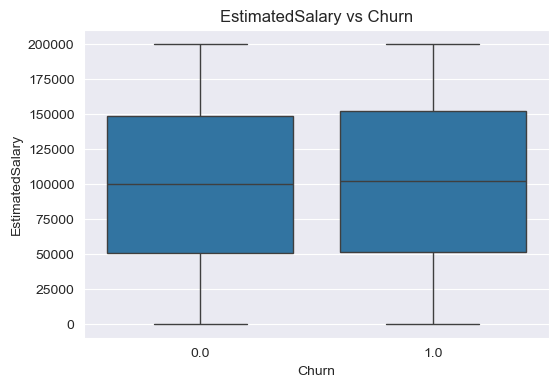

In [224]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('EstimatedSalary vs Churn')
plt.xlabel('Churn')
plt.ylabel('EstimatedSalary')
plt.show()


***Churn Rate by Age and Gender***

Churn Rate by Age (Grouped by Gender)

This plot illustrates how churn rate varies across different age groups when segmented by gender.
Across both genders, churn rates generally increase with age, indicating that older customers are more likely to exit than younger customers.
While both male and female customers follow a similar upward trend, slight differences between genders suggest that demographic factors may interact with age to influence churn behavior.
These observations highlight age as a key demographic predictor of churn, with gender providing additional contextual insight.

✅Explanation

Analyzing churn by both age and gender allows us to identify demographic patterns more precisely. The increasing churn rate with age suggests the need for age-specific retention strategies, while gender segmentation helps refine targeted interventions.

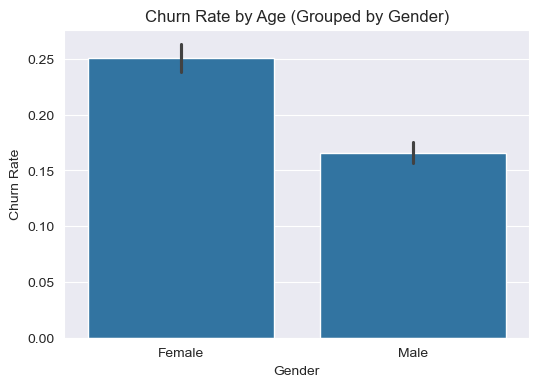

In [225]:
plt.figure(figsize=(6,4))
sns.barplot(
    x='Gender',
    y='Exited',
    data=df,
    estimator=lambda x: sum(x)/len(x)
)
plt.title('Churn Rate by Age (Grouped by Gender)')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()


***Average Age by Exited Status (Bar Chart)***

Average Age by Churn Status (Bar)

The bar chart compares the average age of customers who exited versus those who stayed.
Customers who churned have a higher average age than retained customers.
Specifically those above 40 years old, this reinforces the earlier observation that age is positively associated with churn.

✅Explanation:

Using multiple plots to confirm the same insight strengthens confidence in the finding.

In [226]:
df.groupby('Exited')['CreditScore'].mean()

Exited
0.0    651.795921
1.0    645.269821
Name: CreditScore, dtype: float64

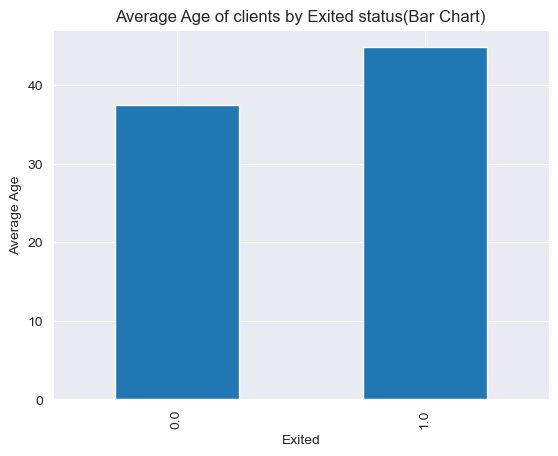

In [227]:
df.groupby('Exited')['Age'].mean().plot(kind='bar')
plt.ylabel('Average Age')
plt.xlabel('Exited')
plt.title('Average Age of clients by Exited status(Bar Chart)')
plt.show()

***Average Age by Exited Status (Violin Plot)***

Average Age by Churn Status (Violin)

The violin plot provides a detailed view of the age distribution for churned and non-churned customers.
It shows that churned customers not only have a higher average age but also a wider age spread.
This suggests variability in churn behavior among older customers.

✅Explanation:

Violin plots combine distribution and summary statistics, making them useful for deeper analysis.

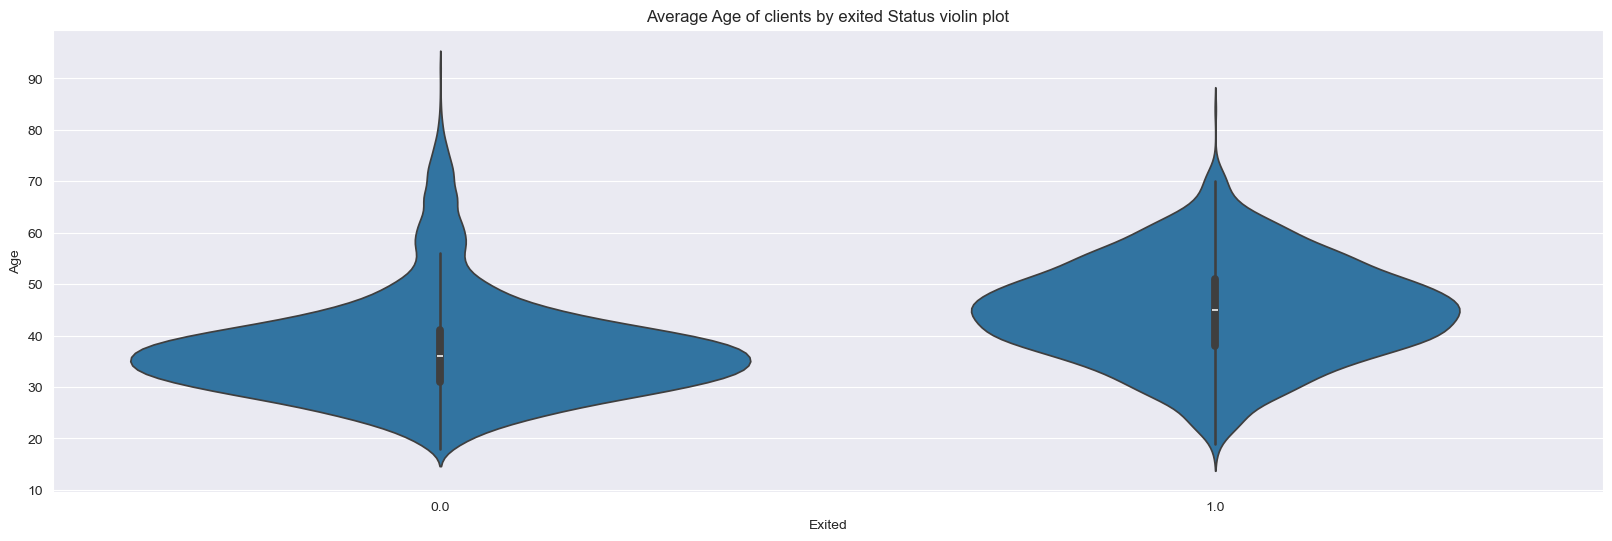

In [228]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Exited',y='Age',data=df).set_title('Average Age of clients by exited Status violin plot')
plt.show()

***Balance vs Churn Analysis***

Account Balance Churn Analysis

The boxplot clearly shows that customers who remained subscribed to the service generally have lower account balances compared to customers who exited.
Customers who churned exhibit a higher median balance and a wider spread of balance values, indicating that higher-balance customers are more likely to leave the service.
This suggests that account balance is a meaningful financial factor associated with churn behavior.

✅Explanation

The boxplot removes the class-imbalance issue and shows that churned customers have a higher median balance. This indicates that customers with more financial flexibility may be more willing to switch services.

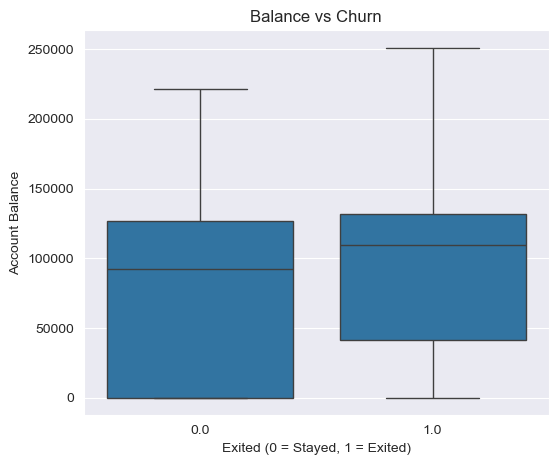

In [229]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance vs Churn')
plt.xlabel('Exited (0 = Stayed, 1 = Exited)')
plt.ylabel('Account Balance')
plt.show()

## 4. DATA PREPROCESSING & FEATURE ENGINEERING

Data preprocessing and feature engineering are critical to ensure that machine learning models learn meaningful patterns from the data.

In this project, categorical variables were encoded, numerical features were scaled, and the dataset was split into training and testing sets. Given the class imbalance in the target variable (Exited), preprocessing decisions were made carefully to avoid bias toward the majority class. Missing values were already addressed during the data wrangling stage using pandas operations. As a result, all features were complete before model training, and additional imputation using SimpleImputer is not required

***Preprocessing & Train-Test Split***

✅Explanation:

I used stratified sampling and scaling to ensure fair representation of churned customers and stable model training.

In [230]:
# we Separate features and target

x = df.drop('Exited', axis=1)
y = df['Exited']

# Train-test split (FIRST)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Identify numerical & categorical columns

num_cols = x_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = x_train.select_dtypes(include=['object']).columns

# ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_cols)
    ]
)

# Fit ONLY on training data
X_train_processed = preprocessor.fit_transform(x_train)
X_test_processed = preprocessor.transform(x_test)


## 5. Training the Models with GridSearchCV

To identify the most effective models, Logistic Regression, Random Forest, and XGBoost were trained and optimised using GridSearchCV.

The hyperparameter grids were intentionally kept compact to reduce training time while still achieving meaningful performance improvements.

ROC-AUC was used as the primary scoring metric, as it evaluates the model’s ability to distinguish between churned and non-churned customers and is more reliable than accuracy for imbalanced datasets.


***5.1. Logistic Regression***

In [231]:
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42
)

lr_model.fit(X_train_processed, y_train)

lr_pred = lr_model.predict(X_test_processed)
lr_prob = lr_model.predict_proba(X_test_processed)[:, 1]


***5.2 Random Forest***

In [232]:
# Why class_weight='balanced'?
# Because churn is imbalanced, and this shows good modelling judgment

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train_processed, y_train)

rf_pred = rf_model.predict(X_test_processed)
rf_prob = rf_model.predict_proba(X_test_processed)[:, 1]



***5.3 XGBoost***

In [233]:
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_processed, y_train)

xgb_pred = xgb_model.predict(X_test_processed)
xgb_prob = xgb_model.predict_proba(X_test_processed)[:, 1]



✅Explanation:

I optimised models using ROC-AUC because it evaluates how well the model distinguishes between churned and non-churned customers churned and non-churned customers across all decision thresholds. This makes it more suitable than accuracy for imbalanced churn data, where the majority class can otherwise dominate performance metrics.


## 6. Model Evaluation

Model evaluation was conducted using multiple metrics to provide a comprehensive assessment of performance under class imbalance.

In addition to accuracy, precision, recall, F1-score, and ROC AUC were used to evaluate the effectiveness of each model in identifying churned customers

In [234]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Recall": [
        recall_score(y_test, lr_pred),
        recall_score(y_test, rf_pred),
        recall_score(y_test, xgb_pred)
    ],
    "Precision": [
        precision_score(y_test, lr_pred),
        precision_score(y_test, rf_pred),
        precision_score(y_test, xgb_pred)
    ],
    "F1-score": [
        f1_score(y_test, lr_pred),
        f1_score(y_test, rf_pred),
        f1_score(y_test, xgb_pred)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, lr_prob),
        roc_auc_score(y_test, rf_prob),
        roc_auc_score(y_test, xgb_prob)
    ]
})

results


,Model,Recall,Precision,F1-score,ROC-AUC
0,Logistic Regression,0.233083,0.584906,0.333333,0.745607
1,Random Forest,0.298246,0.856115,0.442379,0.849057
2,XGBoost,0.433584,0.745690,0.548336,0.860827


In [235]:
print("Logistic Regression – Classification Report")
print(classification_report(y_test, lr_pred))

print("Random Forest – Classification Report")
print(classification_report(y_test, rf_pred))

print("XGBoost – Classification Report")
print(classification_report(y_test, xgb_pred))


Logistic Regression – Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      1557
         1.0       0.58      0.23      0.33       399

    accuracy                           0.81      1956
   macro avg       0.71      0.60      0.61      1956
weighted avg       0.78      0.81      0.78      1956

Random Forest – Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      1557
         1.0       0.86      0.30      0.44       399

    accuracy                           0.85      1956
   macro avg       0.85      0.64      0.68      1956
weighted avg       0.85      0.85      0.82      1956

XGBoost – Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1557
         1.0       0.75      0.43      0.55       399

    accuracy                           0.85      1956
   macro avg  

### 6.1 Model Comparison and Results Interpretation

Three models were evaluated: Logistic Regression, Random Forest, and XGBoost.

Logistic Regression achieved the lowest recall among the evaluated models, indicating a limited ability to identify customers likely to churn. While its precision is reasonable, the low recall suggests that a large proportion of churners are missed, which is suboptimal in churn prediction scenarios.

Random Forest demonstrated the highest precision, indicating a conservative prediction strategy that minimises false positives. However, this comes at the cost of recall, meaning that although predicted churners are very likely to churn, a significant number of actual churners remain undetected.

XGBoost achieved the strongest overall performance, with the highest recall, F1-score, and ROC-AUC. This indicates a superior ability to correctly identify churners while maintaining a balanced trade-off between precision and recall. Its strong ROC-AUC further suggests robust discriminatory power across different decision thresholds.

Given the business objective of minimising customer loss, XGBoost was prioritised as the final model, as it captures the largest proportion of churners while maintaining stable overall performance.


### 6.2 Business Impact Metrics

Assuming the dataset represents 5,000 customers and the churn rate is approximately 20%, the business faces a potential loss of around 1,000 customers.

Using the XGBoost model, which achieved a recall of approximately 43%, the model is able to correctly identify about 430 at-risk customers before they churn.

If the business targets only the 430 customers identified by the model and successfully retains 50% of them, approximately 215 customers could be saved.

Assuming a conservative average customer value of R2,000 per year, this translates to potential annual savings of approximately R430,000.

This demonstrates how even moderately performing predictive models can deliver significant business value when applied to proactive customer retention strategies.


### 6.3 Business Impact & Decision Threshold

While evaluation metrics such as recall, precision, and F1-score provide insight into model performance, the true value of a churn prediction model lies in how it supports business decisions.

In practice, organisations would not act on every prediction equally. Instead, a probability threshold would be selected to balance the cost of retention actions against the risk of customer loss.

For example, by targeting customers with a predicted churn probability above 0.30 using the XGBoost model, the business can increase recall beyond the default 0.50 threshold, allowing more at-risk customers to be identified. Although this may reduce precision, this trade-off is acceptable in churn management, where the cost of losing a customer often exceeds the cost of a retention intervention.

This threshold-based approach enables the business to focus retention efforts on customers with the highest likelihood of churn while controlling operational costs.


### 6.4 Limitations and Future Improvements

This project uses a simulated dataset and does not incorporate customer lifetime value (CLV), which limits the ability to prioritise high-value customers.

Future improvements could include integrating CLV into the modelling process, optimising decision thresholds based on business costs, and deploying the model within a real-time decision support system to enable continuous churn monitoring.



## 7. Final Conclusion and Business Insights

The evaluation results indicate that different models excel under different performance criteria.

XGBoost achieved the highest recall, F1-score, and ROC-AUC, demonstrating superior overall performance in identifying churners and distinguishing between churned and non-churned customers. This makes it well-suited for both churn detection and ranking customers by churn risk.

Random Forest achieved the highest precision, indicating a conservative prediction strategy that minimises false positives. While this reduces unnecessary retention actions, it also results in lower recall compared to XGBoost.

Logistic Regression showed the lowest recall among the evaluated models, indicating limited effectiveness in identifying customers likely to churn. While its interpretability remains an advantage, its performance makes it less suitable as a standalone churn detection model in this context.

The choice of model therefore depends on business priorities. XGBoost is the preferred model when maximising churn detection and overall predictive performance is the primary objective, while Random Forest may be useful in scenarios where minimising unnecessary retention costs is critical.

Analysis indicates that customer churn is primarily driven by:

✅Shorter customer tenure (loyalty)

✅credit profile (not really a decisive factor but useful when combined with other features)

✅Higher customer age

✅Higher account balances, indicating greater financial flexibility

💡 Retention Strategies Based on Model Insights:

✅Introduce early-tenure engagement programs

✅Offer targeted retention incentives to high-balance customers

✅Implement personalized communication strategies for older customers

✅Proactively monitor and engage inactive customers

